# Creating a Pipeline using a Corpus Class

When working with a corpus of texts it can quickly become confusing to keep track of which step in an NLP pipeline you are on. Say you want to run a Frequency Distribution, did you remember to tokenize the text? To pull out the stopwords? While this is simple enough if you are working with a small group of texts in a discrete timeperiod, this quickly becomes challenging when working with a large body of texts or when working over a longer period of time. Matters become more complicated if you want to switch between corpus-level analysis and text-level analysis. The realities of your project may quickly mean that manually performing each step in your pipeline becomes redundant, hard to keep track of, or a waste of time. This is where objects and classes can come in. 

This can get confusing so we'll start with an example. I own a cat. Cats have certain qualities:

* furry
* color
* four legs
* personality

And they do certain things:

* eat
* sleep
* scratch
* generally enrich the lives of all around them.

Any one cat might be different than another. Your cat might not have fur. It might have fewer than four legs. It might not enrich your life (hard to believe). What we have here is a set of characteristics and verbs that describe the thing that is a cat. Not all cats, but one type of cat. 

One more example. Consider a house. We might assume that it has certain qualities: 

* a roof
* a front door
* walls
* a window

And you can do certain things to, with, or in a house:

* open the front door
* sell it
* paint a wall

You could debate these features and these actions, particularly their regional and socioeconomic specificity. Not all houses look like this. It's perhaps better to think of these lists as the template for a certain kind of house rather than all houses. A house example because buildings generally have blueprints - the template that is used to construct the specific house out of the general characteristics.  

**Object-oriented programming** is a way of organizing your code into patterns like this, separating the qualities of your corpus (its "attributes") from the instructions for things you want to execute on those attributes (its "methods"). The result is that, rather than think of your code as a directional sequence of events, we are instead thinking about the underlying collections of data and the characteristics that define them. To take a more technical example, you might consider an email object. 

**Email Object**

Attributes

* has a sender
* has a date
* has a body
* may have some attachments

Methods

* can be sent
* can be received
* can be trashed

It is not too difficult to imagine associated pieces of code meant to do each of these particular things. You might have a funtion that defines the sender of an email based on some input, and you might have another that looks to a mail server to send out that note when instructed to do so. For humanists, this can be an easier way to organize things. Ultimately, thinking in objects allows you to more easily organize text-level and corpus-level functions, is easier to grasp when working at scale, and allows you to store your parameters so they can be imported as a module (a file that contains Python definitions and statements).  

To go back to our house example, if the house is the object then a **class** is the blueprint for how one of those objects is built. A class is the template that we write in Python that helps to pull everything together using the attributes and methods we specify. Classes can be as simple or as complex as you want them to be. In the following template, we will define a "Corpus" and a "Text" class and assign to each class the different attributes we want it to contain and sample methods that might commonly be executed within an NLP project on those attributes. You might want to create your own classes for different use cases. But we find that thinking about corpus and the individual texts within it as distinct texts can be a helpful way to organize things. In the example below, in addition to other things, we describe our corpus like so:

**Corpus Object**

Attributes

* has a corresponding directory
* has a series of filenames corresponding to the text files contained within that folder
* contains many different Text objects

**Text Object**

Attributes

* has a filename associated with it
* has a raw version of the text
* has a tokenized version

Methods

* the text can be converted from a file into a raw version
* the raw version can be tokenized

And so on. 

In what follows below, the first code block is a class code template. This script could be saved as a file in your working directory and updated as neccessary. The subsequent blocks of code can be used in the interpreter to import the class as a module or to reload the class after any changes are made to it. Working with classes in the way we describe below enables you to move back-and-forth between writing/tweaking your code and interacting with it within the interpreter.

In [24]:
import os
import nltk
import string


class Corpus(object):
    # rather than enter the data bit by bit, we create a constructor that takes in the data at one time
    # all the attributes we want the class to have follow the __init__ syntax
    def __init__(self, corpus_dir):
        # all the attributes we want the class to have
        self.dir = corpus_dir # where corpus_dir is - the corpus' filepath
        # classes may contain functions we define ourselves, the all_files() function is defined below
        self.filenames = self.all_files()
        # this attribute calls nltk's built in English stopwords list and supplements it with punctuation and some extra characters we defined. 
        self.stopwords = nltk.corpus.stopwords.words('english') + [char for char in string.punctuation] + ['``', "''"]
        self.texts = [Text(fn, self.stopwords) for fn in self.filenames]

    def all_files(self):
        """given a directory, return the filenames in it"""
        texts = []
        for (root, _, files) in os.walk(self.dir):
            for fn in files:
                print(fn)
                if fn[0] == '.': # a new addition!
                    pass
                else:
                    path = os.path.join(root, fn)
                    texts.append(path)
        return texts

# the Text class works the same as the Corpus, but will contain text-level only attributes
class Text(object):
    # now create the blueprint for our text object
    def __init__(self, fn, stopwords):
        # given a filename, store it
        self.filename = fn
        # a text has raw_text associated with it
        self.raw_text = self.get_text()
        # a text has raw tokens
        self.raw_tokens = nltk.word_tokenize(self.raw_text)
        # a text will have a clean version of those tokens
        self.cleaned_tokens = self.clean_tokens(stopwords)
        # we also want, in this case, to make an NLTK text object
        self.nltk_text = nltk.Text(self.cleaned_tokens)
        
    def get_text(self):
        with open(self.filename) as fin:
            return fin.read()
    
    def clean_tokens(self, stopwords):
        return [token.lower() for token in self.raw_tokens if token not in stopwords]
        
# this is what runs if you run the file as a one-off event - $ python3 class_practice.py
def main():
    corpus_dir = 'corpus/sonnets/'
    print('As mentioned above, this output presents as though it is being run from the command line.') # anything that you might want to jump to, such as a graph, FreqDist, etc. would go here

# this allows you to import the classes as a module. it uses the special built-in variable __name__ set to the value "__main__" if the module is being run as the main program
if __name__ == "__main__":
    main()

As mentioned above, this output presents as though it is being run from the command line.


The payoff of organzing your project within classes is that you can run them as a module from the interpreter or as a Python file from the terminal. For the remainder of this section, we have inserted the above code into a file called file class_practice.py. The following code blocks show how you might go about importing the class and working with it in the terminal. 

To work with our class in the Python in the interpreter, we first import our script and instantiate our corpus object.

In [32]:
# import the script as a module--file name without the extension
import class_practice 

# store the path to the corpus directory
corpus_dir = "corpus/sonnets/"
# create a new corpus using our class template
this_corpus = class_practice.Corpus(corpus_dir)

# now we can access elements of our corpus by accessing this_corpus
print(this_corpus.dir) # will show the directory of the corpus
print(this_corpus.filenames) # returns all the filenames in the corpus

# to work with the text class, instantiate the particular text you want to use


corpus/sonnets/
['corpus/sonnets/sonnet_two.txt', 'corpus/sonnets/sonnet_five.txt', 'corpus/sonnets/sonnet_four.txt', 'corpus/sonnets/sonnets_three.txt', 'corpus/sonnets/sonnet_one.txt']


Now that our corpus is in the interpreter, we can confirm that it contains many texts:

In [33]:
this_corpus.texts

That is a little confusing. As a humanist, we might expect to see the titles of the text or something similar. But we haven't told our class anything like that. Instead, our corpus points to particular texts, represented by their locations in our computer's memory. But, since this is just a list, we can pull out individual texts like you would any other item in a list:

In [39]:
first_text = this_corpus.texts[0]

# from here, any of our text level attributes will be available to us:
print(first_text.filename)
print(first_text.raw_text)

corpus/sonnets/sonnet_two.txt
When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.



We could loop over our corpus to pull out information from each text object:

In [49]:
for text in this_corpus.texts:
    print(text.filename)
    
# get the first few characters from each line
for text in this_corpus.texts:
    print(text.raw_text[0:40])

corpus/sonnets/sonnet_two.txt
corpus/sonnets/sonnet_five.txt
corpus/sonnets/sonnet_four.txt
corpus/sonnets/sonnets_three.txt
corpus/sonnets/sonnet_one.txt
When forty winters shall besiege thy bro
Those hours, that with gentle work did f
Unthrifty loveliness, why dost thou spen
Look in thy glass and tell the face thou
FROM fairest creatures we desire increas


Depending on how complex you've made your text objects, you can get to some interesting analysis right away. Here, we take advantage of the fact that we use NLTK's more robust Text object to look at the top words in each text.

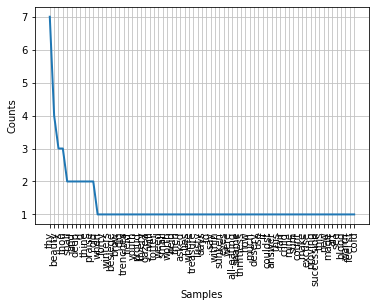

None


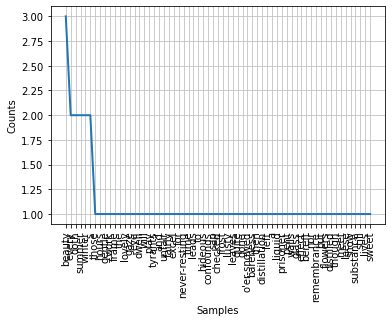

None


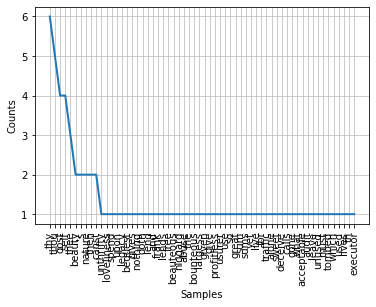

None


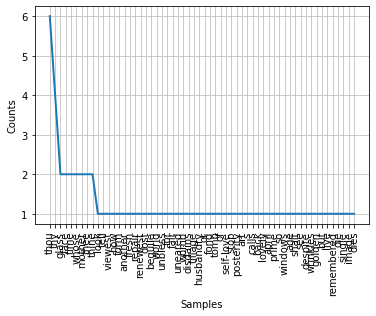

None


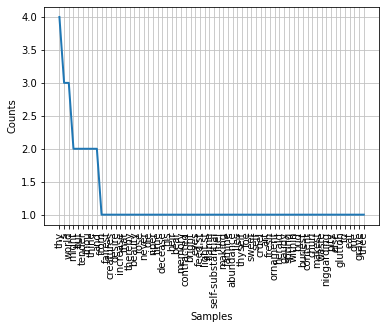

None


In [51]:
for text in this_corpus.texts:
    print(text.nltk_text.plot())

Theoretically, the process is agnostic of what texts are actually in the corpus folder. So you could use this as a starting point for analysis without having to reinvent the wheel each time. However, corpus is different and likely to present its own difficulties. For example, if we wanted to use a TEI-encoded text, this class would not be able to accommodate such a thing. But organizing things with classes means that we could add that to our pipeline if we wished. 

As you make changes to your class_practice file, you have to re-import it into python and re-instantiate your classes. This makes sure you are running the most up-to-date version of your file. 

In [31]:
import importlib

importlib.reload(class_practice)

#re-instantiate the corpus or text


<module 'class_practice' from '/Users/bmw9t/projects/humanists-nlp-cookbook/class_practice.py'>

Add more examples